# IMPORT ALL THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import all the libraries for the neural network model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist

# DATA PREPROCESSING OF MNIST

In [3]:
# loading the dataset
data = mnist.load_data()
print(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [4]:
# Dividing the dataset into training and testing data
(X_train,_),(X_test,_) = mnist.load_data()

In [6]:
# Normalize the training and testing data in the range of 0 and 1
X_train = X_train.astype('float')/255.0

X_test = X_test.astype('float')/255.0

In [7]:
# shape of the training and testing data
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# reshape all the data  by performing the flattening operation to make all the rows and columns in one row
X_train = X_train.reshape(len(X_train), X_train.shape[1]**2)
X_test  = X_test.reshape(len(X_test), X_test.shape[1]**2)

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# CREATION OF AUTOENCODER

In [11]:
# Creating an Input layer
Input_Img = Input(shape = (784,))

# creation of the first layer for encoding
a1 = Dense(units = 256, activation = 'relu')(Input_Img)
# creation of the second layer for encoding
a2 = Dense(units = 128, activation = 'relu')(a1)
# creation of the third layer for encoding
a3 = Dense(units = 64, activation = 'relu')(a2)
# creation of encoded layer
encoded = Dense(units = 32, activation = 'relu')(a3)


# creation of the first layer for decoding
b1 = Dense(units = 32, activation = 'sigmoid')(encoded)
# creation of the second layer for decoding
b2 = Dense(units = 128, activation = 'sigmoid')(b1)
# creation of the third layer for decoding
b3 = Dense(units = 256, activation = 'sigmoid')(b2)
# creation of decoded layer
decoder = Dense(units = 784, activation = 'sigmoid')(b3)
                
# creation of the autoencoder layer
model = Model(Input_Img, decoder)

In [12]:
# proivide the summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 128)               4224  

In [14]:
# creating the encoder model
encoder = Model(Input_Img, encoded)

# COMPILING THE AUTOENCODER MODEL

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy'])

# TRAIN THE AUTOENCODER MODEL

In [16]:
model.fit(X_train,
          X_train,
         epochs = 100,
         batch_size = 256,
         shuffle = True,
         validation_data = (X_test, X_test))

Epoch 1/100
235/235 [==============================] - 4s 13ms/step - loss: 0.0307 - Accuracy: 0.0120 - val_loss: 0.8734 - val_Accuracy: 0.0091
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0042 - Accuracy: 0.0126 - val_loss: 0.8876 - val_Accuracy: 0.0161
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0041 - Accuracy: 0.0145 - val_loss: 0.8903 - val_Accuracy: 0.0161
Epoch 4/100
235/235 [==============================] - 2s 11ms/step - loss: 0.0040 - Accuracy: 0.0149 - val_loss: 0.8921 - val_Accuracy: 0.0161
Epoch 5/100
235/235 [==============================] - 2s 11ms/step - loss: 0.0040 - Accuracy: 0.0151 - val_loss: 0.8922 - val_Accuracy: 0.0143
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0040 - Accuracy: 0.0148 - val_loss: 0.8929 - val_Accuracy: 0.0161
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0040 - Accuracy: 0.0147 - val_loss: 0.8931 - val_Accuracy:

# PREDICTING THE AUTOENCODER VALUES

In [37]:
# predicting all the encoder values
pred_encoder = encoder.predict(X_test)
print(pred_encoder)

[[ 0.         4.0561056 11.544729  ... 28.261303   0.         0.       ]
 [ 0.         4.5728674 12.699517  ... 30.740177   0.         0.       ]
 [ 0.         3.360636   8.621525  ... 21.330652   0.         0.       ]
 ...
 [ 0.         6.5935163 17.71076   ... 43.186825   0.         0.       ]
 [ 0.         5.5943437 15.288896  ... 37.317764   0.         0.       ]
 [ 0.         6.8006043 18.217926  ... 44.62705    0.         0.       ]]


In [38]:
# predicting all the autoencoder values
pred_autoencoder = model.predict(X_test)
print(pred_autoencoder)

[[1.1065363e-07 1.0527654e-07 9.6931849e-08 ... 1.0435472e-07
  1.0711813e-07 1.0785927e-07]
 [1.1065363e-07 1.0527654e-07 9.6931849e-08 ... 1.0435472e-07
  1.0711813e-07 1.0785927e-07]
 [1.1065363e-07 1.0527654e-07 9.6931849e-08 ... 1.0435472e-07
  1.0711813e-07 1.0785927e-07]
 ...
 [1.1065363e-07 1.0527654e-07 9.6931849e-08 ... 1.0435472e-07
  1.0711813e-07 1.0785927e-07]
 [1.1065363e-07 1.0527654e-07 9.6931849e-08 ... 1.0435472e-07
  1.0711813e-07 1.0785927e-07]
 [1.1065363e-07 1.0527654e-07 9.6931849e-08 ... 1.0435472e-07
  1.0711813e-07 1.0785927e-07]]


# PLOTTING ALL THE AUTOENCODER VALUES

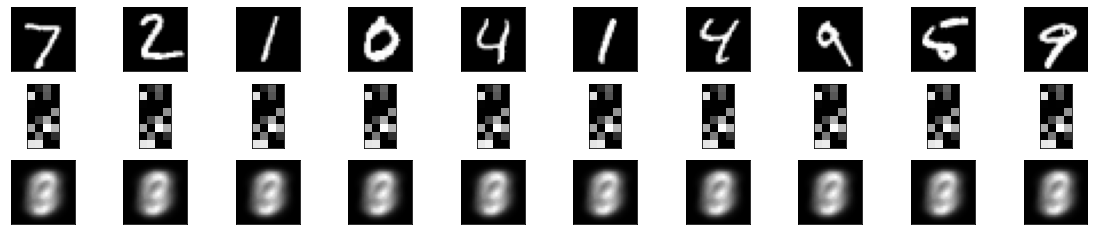

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 4))
for i in range(10):
    # Display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display encoded
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(pred_encoder[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display decoded
    ax = plt.subplot(3, 20, 2 * 20 + i + 1)
    plt.imshow(pred_autoencoder[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()